In [94]:
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants as pc
from gaussxw import gaussxwab, gaussxw
from timeit import default_timer as timer
import scipy.integrate as integrate 

# TP1 : Parcours des protons dans la matière

## 1.

   \cite{newhauser2015physics} nous informe que l'énergie cinétique des protons utilisés en protonthérapie varie entre 11 et 220 MeV, énergies correspondant à des distances de pénétration respectives de 1mm et 30 cm. Cette dernière étant la plus creuse que nous pouvons atteindre, on en déduit que l'énergie maximale typiquement utilisée est 220 MeV. Malgré le fait que l'énergie maximale typique est de 220 MeV, \cite{newhauser2015physics} mentionne aussi qu'elle peut atteindre 250 MeV dans certains cas.

### Relation entre le facteur de Lorentz $\gamma$ et l'énergie du proton $T$
l'énergie totale d'un proton est la somme de son énergie de masse au repos et de son énergie cinétique tel que,

\begin{align}
E = m_p c^2 + T
\end{align}

Par contre, l'énergie totale d'un proton en mouvement est aussi éagale à $\gamma m_p c^2$. On peut ainsi écrire, 

\begin{align}
E = \gamma m_p c^2 &= m_p c^2 + T\\
\Rightarrow\ T &=  m_p c^2 (\gamma - 1)
\end{align}

Bref, en considérant la masse du proton en électron-Volts, on peut réécrire l'énergie cinétique $T$ comme,

\begin{align}
T =  m_p (\gamma - 1)\ \ [eV]
\end{align}

 
### Relation entre le facteur de Lorentz $\gamma$ et la vitesse réduite $\beta$  

Sachant que $\gamma$ et $\beta$ sont définit comme,

\begin{align}
\gamma = \frac{1}{\sqrt{1-v^2/c^2}}, \ \ \beta = \frac{v}{c}
\end{align}

leur relation s'exprime comme

\begin{align}
\Rightarrow\ \gamma = \frac{1}{\sqrt{1-\beta^2}}, \ \ \beta = \sqrt{\frac{\gamma^2 - 1}{\gamma^2}}
\end{align}

## 2. 
Dimensionnellement, la densité électronique s'exprime comme le nombre d'électrons contenu par unité de volume, i.e. 

\begin{align}
n_e = \left[\frac{\text{Nombre d'électrons}}{cm^3}\right]
\end{align}

La masse atomique est égale au nombre de nucléons présents dans l'atome. Par exemple, la masse molaire de l'eau se calcule comme suit,

\begin{align}
M_{H_2 O} = 2\times M_H + M_O = 2\times 1 + 16 = 18\ g\cdot mol^{-1}
\end{align}

Ainsi, la masse atomique d'une molécule s'exprime comme la masse de chacun de ses atomes, i.e.

\begin{align}
M = \sum_{i=1}^{k} c_i M_i,
\end{align}

où $k$ est le nombre d'atomes, $M_i$ leur masse atomique et $c_i$, le nombre d'atome du même type. De plus, le nombre d'électron présent dans une molécule est égal au nombre total de protons, 

\begin{align}
\frac{Nombre\ d'électron}{molécule} = \sum_{i=1}^{k} c_i Z_i
\end{align}

Bref, par analyse dimensionelle, on peut exprimer la densité électronique comme:

\begin{align}
n_e &\doteq \left[\frac{Nombre\ de\ molécule}{mol}\right]\cdot\left[\frac{mol}{g}\right]\cdot\left[\frac{Nombre\ d'électron}{molécule}\right]\cdot\left[\frac{g}{cm^3}\right] \\
\Rightarrow\ n_e &= N_a \rho \frac{\sum_{i=1}^{k}c_i Z_i}{\sum_{i=1}^{k}c_i M_i} \label{dens}
\end{align}

On a ainsi que, pour l'eau, avec un nombre d'électrons de 10, un nombre de nucléons de 18 et une densité de 1 $g\;cm{-3}$, la densité électronique telle que

\begin{align}
n_e{_{H_2 O}} = N_a\cdot (1)\cdot \frac{10}{18} = \frac{5}{9}N_a\ \ [g\;cm^{-2}]
\end{align}

Passons maintenant à l'os cortical. Les données fournies par le NIST [METTRE RÉFÉRENCE], ne nous informent pas directement sur le nombre d'atome $c_i$ présent dans la molécule, mais plutôt le ratio de masse entre l'atome et la molécule appelé la fraction par poids ($F_{pp}$). On peut obtenir $c_i$ en inversant la définition de la $F_{pp}$, 

\begin{align}
F_{pp_i} = \frac{c_i M_i}{M_{tot}} \Rightarrow\ c_i = \frac{F_{pp_i} M_{tot}}{M_i}
\end{align}

En substituant cette définition de $c_i$ dans \eqref{dens}, on obtient l'expression suivante pour la densité électronique,

\begin{align}
n_e = N_a \rho \sum_{i=1}^{n} \frac{F_{pp_i} Z_i}{M_i}
\end{align}

Avec les données fournies par le NIST [REF], les masses atomiques des atomes d'intérêt prises sur le tableau périodique des éléments [REF] et la densité de l'os cortical de 1,85 $g/cm^3$, on obtient que la densité électronique de l'os cortical est,

\begin{align}
n_e{_{cort}} \approx 0,96438 N_a\ \ [g\;cm^{-2}]
\end{align}

Comme la gamme d'énergie typique utilisée en proton thérapie va de 11 MeV à 220 MeV, il est légitime de négliger les termes de correction du pouvoir d'arrêt collisionnel.

\begin{align}
S_{col}(T) = 2\pi r_e^2 m_e c^2 n_e \frac{1}{\beta^2}\left[\ln\left(\frac{2 m_e c^2 \beta^2 \gamma^2 T_e^{max}}{I^2}\right) - 2\beta^2\right]
\end{align}

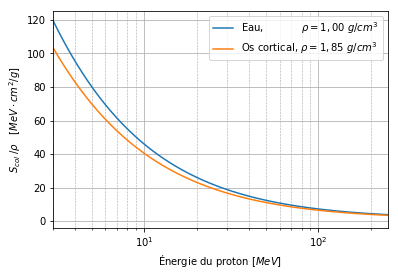

In [5]:
%matplotlib inline

# Définition des paramètres utilisés dans les calculs
r_e = pc['classical electron radius'][0] * 100  # Conversion de m à cm
N_a = pc['Avogadro constant'][0]

n_e_eau = 5*N_a/9
n_e_cort = 0.96438*N_a

I_eau = 75e-6
I_cort = 106.4e-6 
 
rho_cort = 1.85


def get_gamma(T, m_p=938.272):
    return T/m_p + 1

def get_beta(gamma):
    return np.sqrt((gamma**2 - 1)/gamma**2)

def get_Te_max(gamma, m_e=0.511, m_p=938.272):
    return (2*m_e*(gamma**2 - 1)/(1 + 2*gamma*m_e/m_p + (m_e/m_p)**2))

def get_s_col(r_e, n_e, T, I, m_e=0.511):
    
    """ Retourne le pouvoir d'arrêt collisonnel d'un matériau
    
    :params:---------------Description---------------: Unités :
           
        r_e: Rayon électronique                          cm
        n_e: Densité électronique du matériau          cm^{-3}
       beta: Facteur de vitesse réduite                  -
      gamma: Facteur de Lorentz                          -
          T: Énergie du proton                           MeV
     Te_max: Énergie maximale transférable p+ -> e-      MeV
          I: Énergie moyenne d'excitation du matériau    MeV
        m_e: Masse de l'électron                         MeV
    """
    
    gamma = get_gamma(T)
    beta = get_beta(gamma)
    Te_max = get_Te_max(gamma)
    
    return 2*np.pi*r_e**2*m_e*n_e*beta**(-2)*(np.log((2*m_e*beta**2*gamma**2*Te_max)/(I**2)) - 2*beta**2)

T = np.linspace(3, 10000, 100000)

s_col_eau = get_s_col(r_e, n_e_eau, T, I_eau)

s_col_cort = get_s_col(r_e, n_e_cort, T, I_cort)

p_col_cort = s_col_cort/rho_cort

plt.plot(T, s_col_eau, label=r"Eau,            $\rho = 1,00\ g/cm^3$")
plt.plot(T, p_col_cort, label=r"Os cortical, $\rho = 1,85\ g/cm^3$")
plt.xscale('log')
plt.grid('True', which='Major')
plt.grid('True', which='Minor', ls='--', linewidth=0.6)
plt.xlabel(r'Énergie du proton $[MeV]$')
plt.ylabel(r"$S_{col}\;/\rho\quad[MeV\cdot cm^2/g]$")
plt.xlim([3,250])
plt.legend()
plt.show()

Avec la figure ci-haut, on remarque que plus l'énergie du proton augmente, plus l'approximation de l'os cortical comme étant de l'eau est valide à cause de la diminution de l'écart de pouvoir d'arrêt collisionnel, celui-ci passant d'environ $20\ MeV\cdot cm^2/g$ à moins de $1\ MeV\cdot cm^2/g$.

## 3.

l'approximation CSDA considère qu'un proton pénétrant la matière subit une décélération continue tout au long de son parcours. Suite à cette décélération, le proton se sera forcément arrêté à une distance que l'on appelle la portée par CSDA ($R_{CSDA}$). Cette portée s'exprime mathématiquement comme, 

\begin{align}
R_{CSDA} = \int_0^{T_i} \frac{dT'}{\frac{S_{col}}{\rho}} \label{porte}
\end{align}

Mais quelles sont les dimensions de la portée $R_{CSDA}$ ? Pour le trouver, procédons à l'analyse dimensionnelle du côté droit de (\ref{porte}). D'abord, 

\begin{align}
\frac{S_{col}}{\rho} = -\left(\frac{dT}{\rho dx}\right) \doteq \left[J(kg\;m^{-3})^{-1}m\right] = \left[J\;kg^{-1}m^2\right]
\end{align}

l'intégrande de (\ref{porte}) a donc des unités de,

\begin{align}
\frac{dT'}{\frac{S_{col}}{\rho}} &\doteq \left[J(J\;kg^{-1}m^2)^{-1}\right] = \left[kg\;m^{-2}\right]\\
R_{CSDA} &\doteq \left[kg\;m^{-2}\right]
\end{align}

Donc, si on cherche à avoir la portée en mètres dans un matériau quelconque, comme l'eau par exemple, il nous faudra diviser $R_{CSDA}$ par la densité de ce dernier, i.e.
\begin{align}
\frac{R_{CSDA}}{\rho} \doteq \left[m\right]
\end{align}

Bref, comme les valeurs de $\frac{S_{col}}{\rho}$ sont souvent fournies dans des tables de données, la portée des protons dans la matière est d'abord définie de façon générale par (\ref{porte}). On peut ensuite obtenir une portée plus "\textit{intuitive}" du proton en divisant par la densité de la matière d'intérêt.

## 4. 

Une particule traversant la matière est soumises à de nombreuses forces. Elle interagira non seulement avec les noyaux atomiques présent dans le matériau en question, mais aussi avec les électrons et si son énergie est assez grande, le rayonnement de freinage entrera en jeu.  Dans notre cas, on approxime la perte d'énergie du proton comme étant linéaire tout au long de son parcours à travers la matière et étant seulement causée par les collisions avec les électrons. Cette approximation est elle juste ? C'est ce que nous allons voir en comparant notre résultat pour le pouvoir d'arrêt collisionnel avec le pouvoir d'arrêt total obtenu des données du PSTAR.


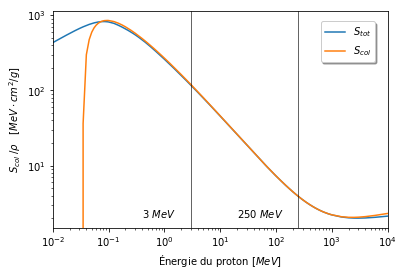

In [6]:
%matplotlib inline

data = np.loadtxt('S_col_tot_pstar.txt')

T_pstar = data[:, 0]
s_tot = data[:, 1]

s_col_eau = get_s_col(r_e, n_e_eau, T_pstar, I_eau)

ax = plt.subplot(111)
plt.plot(T_pstar, s_tot, label=r"$S_{tot}$")
plt.plot(T_pstar, s_col_eau, label=r"$S_{col}\quad$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Énergie du proton $[MeV]$')
plt.ylabel(r"$S_{col}\;/\rho\quad[MeV\cdot cm^2/g]$")
plt.axvline(3, c='k', linewidth=0.6)
plt.axvline(250, c='k', linewidth=0.6)
plt.text(0.4, 2, r'$ 3\ MeV$')
plt.text(20, 2, r'$ 250\ MeV$')
plt.xlim([1e-2, 1e4])
ax.legend(bbox_to_anchor=(0.8, 0.95), loc=2, borderaxespad=0., fancybox=True, shadow=True)
plt.show()

In [16]:
def get_rms(data1, data2):
    rms = np.sqrt(np.mean((data1-data2)**2))
    return rms
i_small, i_3, i_250, i_1000 = np.where(T_pstar == 1e-1)[0][0], np.where(T_pstar == 3)[0][0],\
                              np.where(T_pstar == 250)[0][0], np.where(T_pstar == 10000)[0][0]

rms_min_small = get_rms(s_tot[:i_small+1], s_col_eau[:i_small+1])
rms_min_3 = get_rms(s_tot[:i_3+1], s_col_eau[:i_3+1]  )
rms_3_250 = get_rms(s_tot[i_3:i_250+1], s_col_eau[i_3:i_250+1])
rms_250_1000 = get_rms(s_tot[i_250:i_1000+1], s_col_eau[i_250:i_1000+1])
rms_1000_max = get_rms(s_tot[i_1000:], s_col_eau[i_1000:])

print(rms_min_small)
print(rms_min_3)
print(rms_3_250)
print(rms_250_1000)
print(rms_1000_max)

#TODO: faire un tableau

63502.169329
46284.7644134
0.660334547191
0.0719238877747
0.181319789184


À partir de ce graphique et des valeurs RMS calculées, il nous est possible de faire 3 constats principaux: 

D'abord, on voit que l'approximation linéaire a un écart considérable avec le pouvoir d'arrêt total pour des énergies entre $10^{-2}$ et $3\ MeV$ avec un RMS dépassant les 46 $GeV\cdot cm^2/g$. Cela s'explique par le fait que l'interaction entre le proton et les noyaux atomiques, mécanisme dominant pour les faibles énergies, est négligée par notre approximation . Il en résulte ainsi une sous estimation du pouvoir d'arrêt réel. 

Par la suite pour la plage d'énergie utilisées en protonthérapie, soit entre $3$ et $250\ MeV$, on remarque autant qualitativement que quantitativement (RMS faible), que l'approximation linéaire modélise bien la réalité, ce qui s'explique par une prédominance du processus collisionnel dans cette gamme d'énergie.

Enfin, malgré un RMS faible entre le pouvoir d'arrêt collisionnel et celui total pour les énergies plus grande que $250\ MeV$, on remarque qualitativement un séparation entre les 2 comportements. Cette séparation a du sens étant donné qu'à de hautes énergies, l'effet Bremsstrahlung sera présent et contribuera ainsi à une augmentation du pouvoir d'arrêt total.

## 9.


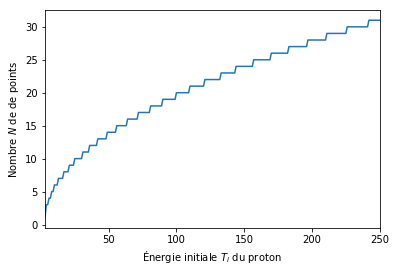

In [30]:
def get_n(N, a, b):
    n = []
    for b_i in b:

        erreur = 1
        N = 0
        while erreur > 1e-9: # Critère de convergence (10^{-9} cm)
            N += 1

            res_N = 0
            res_2N = 0

            x_N, w_N = gaussxwab(N, a, b_i)
            x_2N, w_2N = gaussxwab(2*N, a, b_i)


            for k in range(N):
                res_N += w_N[k]/get_s_col(r_e, n_e_eau, x_N[k], I_eau)

            for l in range(2*N):
                res_2N += w_2N[l]/get_s_col(r_e, n_e_eau, x_2N[l], I_eau)

            erreur = abs(res_N - res_2N)
    
        n.append(N)
        
    return n
    
b= np.arange(3, 251, 1)

n = get_n(0, 3, b)

plt.plot(b,n)
plt.xlabel('Énergie initiale $T_i$ du proton')
plt.ylabel('Nombre $N$ de de points')
plt.xlim([3,250])
plt.show()



In [87]:
def translate_xw(x, w, a, b):
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def gauss_quad(a, b, N=31):
    res = []
    
    x, w = gaussxw(N)
    
    for b_i in b:
        #s= 0
        x_i, w_i = translate_xw(x, w, a, b_i)
        
        s = sum(w_i/get_s_col(r_e, n_e_eau, x_i, I_eau))
        
        #for k in range(N):
        #    s+= w_i[k]/get_s_col(r_e, n_e_eau, x_i[k], I_eau)
            
        res.append(s)
        
    return res    

energie = np.random.normal(240, 3, 10000)

start = timer()
portee = gauss_quad(3, energie)
end = timer()

time = np.round(end-start, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time, "secondes")

Temps requis pour calculer la portée de 10 000 protons :  0.65 secondes


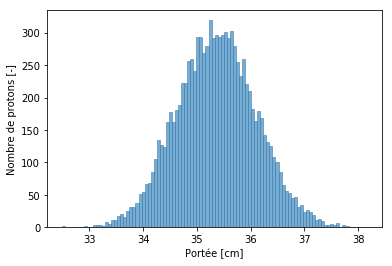

In [88]:
plt.hist(portee, bins=100,  alpha = 0.6, edgecolor='steelblue')
plt.xlabel('Portée [cm]')
plt.ylabel('Nombre de protons [-]')
plt.show()

## 10.

Temps requis pour calculer la portée de 10 000 protons :  0.83 secondes


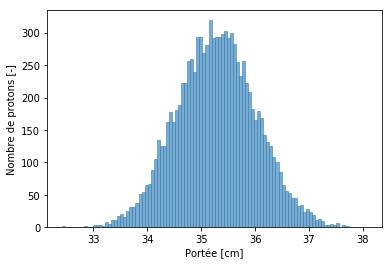

In [89]:
def trapz_integration(x, N):
    res = []
    for x_i in x:
        
        points = np.linspace(3, x_i, N)
        h = points[1]- points[0]
    
        f = 1/get_s_col(r_e, n_e_eau, points, I_eau)
        
        s = h*(0.5*f[0] + sum(f[1: -1]) + 0.5*f[-1])
        
        res.append(s)
        
    return res

start_trapz = timer()

portee_trapz = trapz_integration(energie, 10)

end_trapz = timer()

time_trapz = np.round(end_trapz - start_trapz, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time_trapz, "secondes")

plt.hist(portee_trapz, bins=100, alpha = 0.6, edgecolor='steelblue')
plt.xlabel('Portée [cm]')
plt.ylabel('Nombre de protons [-]')
plt.show()

## 11.

Temps requis pour calculer la portée de 10 000 protons :  12.85 secondes


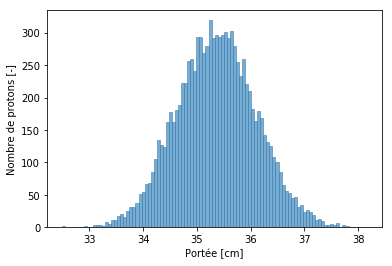

In [106]:
def scipy_integration(x):
    res = []
    for x_i in x:
        s = integrate.quad(lambda T: 1/get_s_col(r_e, n_e_eau, T, I_eau), 3, x_i)[0]
        res.append(s)
    
    return res

start_sc = timer()

portee_scipy = scipy_integration(energie)

end_sc = timer()

time_sc = np.round(end_sc - start_sc, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time_sc, "secondes")


plt.hist(portee_scipy, bins=100, alpha = 0.6, edgecolor='steelblue')
plt.xlabel('Portée [cm]')
plt.ylabel('Nombre de protons [-]')
plt.show()

# References

(<a id="cit-newhauser2015physics" href="#call-newhauser2015physics">Newhauser and Zhang, 2015</a>) Newhauser Wayne D and Zhang Rui, ``_The physics of proton therapy_'', Physics in Medicine & Biology, vol. 60, number 8, pp. R155,  2015.

